# Analisis Sentimen Ulasan Aplikasi Taspen Otentikasi Menggunakan Metode Klasifikasi Algoritma Naive Bayes

# scraping data

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Impor paket yang diperlukan

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.hisign.feacapan',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8de8f214-1fc6-492c-b584-303821e98765,Arif Satri,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasinya buruk, proses detect tidak bisa pd...",1,13,1.6.8,2023-09-11 09:00:40,None,NaT,1.6.8
1,95e53ea4-9347-42b5-8a0f-4b8bafcd716b,Hariyadi plh,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harap kepada pengembang, autentikasi berhasil ...",3,66,1.6.8,2023-09-02 12:24:26,None,NaT,1.6.8
2,6ece8588-1e00-49e9-9347-80ea6db4d44b,YUSFILLAH_ Kampar,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong diperbaikai saat autentifikasi wajah te...,1,64,1.6.8,2023-08-07 04:03:24,None,NaT,1.6.8
3,c6094062-052a-44cd-b7b7-03d190426545,Henrita Shasy reza,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sudah sering error aplikasinya, sering berulan...",1,6,1.6.8,2023-09-04 02:49:34,None,NaT,1.6.8
4,9c4c64eb-f337-4f65-81a9-bdc05df2b599,Ana Ningsih,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak lansia friendly. Perintah yang diberikan...,1,8,1.6.8,2023-08-25 13:20:08,None,NaT,1.6.8


In [ ]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

1000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Arif Satri,1,2023-09-11 09:00:40,"Aplikasinya buruk, proses detect tidak bisa pd..."
1,Hariyadi plh,3,2023-09-02 12:24:26,"Harap kepada pengembang, autentikasi berhasil ..."
2,YUSFILLAH_ Kampar,1,2023-08-07 04:03:24,Tolong diperbaikai saat autentifikasi wajah te...
3,Henrita Shasy reza,1,2023-09-04 02:49:34,"Sudah sering error aplikasinya, sering berulan..."
4,Ana Ningsih,1,2023-08-25 13:20:08,Tidak lansia friendly. Perintah yang diberikan...


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
265,Trisna Rema,5,2023-09-15 01:01:35,Setiap kali mau otentikasi selalu gagal.klw ma...
130,Noverisita iriani w.,2,2023-09-15 00:33:36,Sering tidak bisa digunakan karena eror atau s...
39,Miftakhur Rokhman,1,2023-09-14 13:03:46,Kalo buat apk yg bener klo belum bs diapake ja...
122,OneBlood.mlbbplayer duts,2,2023-09-14 09:14:35,Aplikasi eror.server sibuk terus katanya.mohon...
239,Johanes Probo,1,2023-09-14 04:13:38,Server sibuk terus jadi enggak bisa masuk


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [ ]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [ ]:
my_df.head()

,content,score
265,Setiap kali mau otentikasi selalu gagal.klw ma...,5
130,Sering tidak bisa digunakan karena eror atau s...,2
39,Kalo buat apk yg bener klo belum bs diapake ja...,1
122,Aplikasi eror.server sibuk terus katanya.mohon...,2
239,Server sibuk terus jadi enggak bisa masuk,1


# PELABELAN

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
265,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif
130,Sering tidak bisa digunakan karena eror atau s...,2,Negatif
39,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif
122,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif
239,Server sibuk terus jadi enggak bisa masuk,1,Negatif
50,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif
191,Sering gagal terus padahal jaringan udh oke,2,Negatif
272,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif
116,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif
241,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# pembersihan data
# data cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif
6,Sering gagal terus padahal jaringan udh oke,2,Negatif
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif


In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    941 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [ ]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe()

,score
count,1000.000000
mean,1.579000
std,1.176071
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

content     0
score       0
Label      59
dtype: int64

# 1. Handling Missing value-Ignore tuple


In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.head(50)

,content,score,Label
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif
6,Sering gagal terus padahal jaringan udh oke,2,Negatif
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif


In [ ]:
my_df.to_csv("taspenpreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.csv

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/taspenpreprocessing.csv')
df.head(50)

,content,score,Label
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif
6,Sering gagal terus padahal jaringan udh oke,2,Negatif
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif,setiap kali mau otentikasi selalu gagalklw mas...
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif,sering tidak bisa digunakan karena eror atau s...
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif,kalo buat apk yg bener klo belum bs diapake ja...
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif,aplikasi erorserver sibuk terus katanyamohon d...
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif,server sibuk terus jadi enggak bisa masuk
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif,aplikasi cacatribetgagal terus nihhtolong dong...
6,Sering gagal terus padahal jaringan udh oke,2,Negatif,sering gagal terus padahal jaringan udh oke
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif,server sibuk coba menit kemudian dari kemarin...
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif,ngga bisa pake android yang lama harus ganti p...
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif,tolong lah pak kemudahan nya karna yang melaku...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif,setiap kali mau otentikasi selalu gagalklw mas...,kali otentikasi gagalklw masukan notasx
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif,sering tidak bisa digunakan karena eror atau s...,eror sibukmohon diperbaiki
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif,kalo buat apk yg bener klo belum bs diapake ja...,kalo apk yg bener klo bs diapake memaksa aplik...
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif,aplikasi erorserver sibuk terus katanyamohon d...,aplikasi erorserver sibuk katanyamohon perbaiki
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif,server sibuk terus jadi enggak bisa masuk,server sibuk masuk
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif,aplikasi cacatribetgagal terus nihhtolong dong...,aplikasi cacatribetgagal nihhtolong aplikasi j...
6,Sering gagal terus padahal jaringan udh oke,2,Negatif,sering gagal terus padahal jaringan udh oke,gagal jaringan udh oke
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif,server sibuk coba menit kemudian dari kemarin...,server sibuk coba menit kemarin gimana ya
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif,ngga bisa pake android yang lama harus ganti p...,ngga pake android ganti hp pengguna lansia
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif,tolong lah pak kemudahan nya karna yang melaku...,tolong kemudahan nya karna lansia tenaga nya s...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif,setiap kali mau otentikasi selalu gagalklw mas...,kali otentikasi gagalklw masukan notasx,"[kali, otentikasi, gagalklw, masukan, notasx]"
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif,sering tidak bisa digunakan karena eror atau s...,eror sibukmohon diperbaiki,"[eror, sibukmohon, diperbaiki]"
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif,kalo buat apk yg bener klo belum bs diapake ja...,kalo apk yg bener klo bs diapake memaksa aplik...,"[kalo, apk, yg, bener, klo, bs, diapake, memak..."
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif,aplikasi erorserver sibuk terus katanyamohon d...,aplikasi erorserver sibuk katanyamohon perbaiki,"[aplikasi, erorserver, sibuk, katanyamohon, pe..."
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif,server sibuk terus jadi enggak bisa masuk,server sibuk masuk,"[server, sibuk, masuk]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3829
------------------------
1 : kali : kali
2 : otentikasi : otentikasi
3 : gagalklw : gagalklw
4 : masukan : masuk
5 : notasx : notasx
6 : eror : eror
7 : sibukmohon : sibukmohon
8 : diperbaiki : baik
9 : kalo : kalo
10 : apk : apk
11 : yg : yg
12 : bener : bener
13 : klo : klo
14 : bs : bs
15 : diapake : diapake
16 : memaksa : paksa
17 : aplikasinya : aplikasi
18 : gk : gk
19 : masak : masak
20 : berkali : kali
21 : gagal : gagal
22 : intinya : inti
23 : jelek : jelek
24 : aplikasi : aplikasi
25 : erorserver : erorserver
26 : sibuk : sibuk
27 : katanyamohon : katanyamohon
28 : perbaiki : baik
29 : server : server
30 : masuk : masuk
31 : cacatribetgagal : cacatribetgagal
32 : nihhtolong : nihhtolong
33 : jngn : jngn
34 : ribet : ribet
35 : kasian : kasi
36 : orang : orang
37 : tua : tua
38 : dah : dah
39 : sepuh : sepuh
40 : jaringan : jaring
41 : udh : udh
42 : oke : oke
43 : coba : coba
44 : menit : menit
45 : kemarin : kemarin
46 : gimana : gimana
47 : ya : ya
48 : ngga : ngga
49

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Setiap kali mau otentikasi selalu gagal.klw ma...,5,Positif,setiap kali mau otentikasi selalu gagalklw mas...,kali otentikasi gagalklw masukan notasx,"[kali, otentikasi, gagalklw, masukan, notasx]",kali otentikasi gagalklw masuk notasx
1,Sering tidak bisa digunakan karena eror atau s...,2,Negatif,sering tidak bisa digunakan karena eror atau s...,eror sibukmohon diperbaiki,"[eror, sibukmohon, diperbaiki]",eror sibukmohon baik
2,Kalo buat apk yg bener klo belum bs diapake ja...,1,Negatif,kalo buat apk yg bener klo belum bs diapake ja...,kalo apk yg bener klo bs diapake memaksa aplik...,"[kalo, apk, yg, bener, klo, bs, diapake, memak...",kalo apk yg bener klo bs diapake paksa aplikas...
3,Aplikasi eror.server sibuk terus katanya.mohon...,2,Negatif,aplikasi erorserver sibuk terus katanyamohon d...,aplikasi erorserver sibuk katanyamohon perbaiki,"[aplikasi, erorserver, sibuk, katanyamohon, pe...",aplikasi erorserver sibuk katanyamohon baik
4,Server sibuk terus jadi enggak bisa masuk,1,Negatif,server sibuk terus jadi enggak bisa masuk,server sibuk masuk,"[server, sibuk, masuk]",server sibuk masuk
5,Aplikasi cacat....ribet....gagal terus nihh......,1,Negatif,aplikasi cacatribetgagal terus nihhtolong dong...,aplikasi cacatribetgagal nihhtolong aplikasi j...,"[aplikasi, cacatribetgagal, nihhtolong, aplika...",aplikasi cacatribetgagal nihhtolong aplikasi j...
6,Sering gagal terus padahal jaringan udh oke,2,Negatif,sering gagal terus padahal jaringan udh oke,gagal jaringan udh oke,"[gagal, jaringan, udh, oke]",gagal jaring udh oke
7,Server sibuk coba 5 menit kemudian dari kemari...,1,Negatif,server sibuk coba menit kemudian dari kemarin...,server sibuk coba menit kemarin gimana ya,"[server, sibuk, coba, menit, kemarin, gimana, ya]",server sibuk coba menit kemarin gimana ya
8,"Ngga bisa pake android yang lama, harus ganti ...",1,Negatif,ngga bisa pake android yang lama harus ganti p...,ngga pake android ganti hp pengguna lansia,"[ngga, pake, android, ganti, hp, pengguna, lan...",ngga pake android ganti hp guna lansia
9,Tolong lah pak kemudahan nya karna yang melaku...,2,Negatif,tolong lah pak kemudahan nya karna yang melaku...,tolong kemudahan nya karna lansia tenaga nya s...,"[tolong, kemudahan, nya, karna, lansia, tenaga...",tolong mudah nya karna lansia tenaga nya kuat


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_taspen.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(752,)
(752,)
(189,)
(189,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_taspen.csv')



MultinomialNB Accuracy: 0.9153439153439153
MultinomialNB Precision: 0.9148936170212766
MultinomialNB Recall: 1.0
MultinomialNB f1_score: 0.9555555555555556
confusion_matrix:
 [[172   0]
 [ 16   1]]

              precision    recall  f1-score   support

     Negatif       0.91      1.00      0.96       172
     Positif       1.00      0.06      0.11        17

    accuracy                           0.92       189
   macro avg       0.96      0.53      0.53       189
weighted avg       0.92      0.92      0.88       189



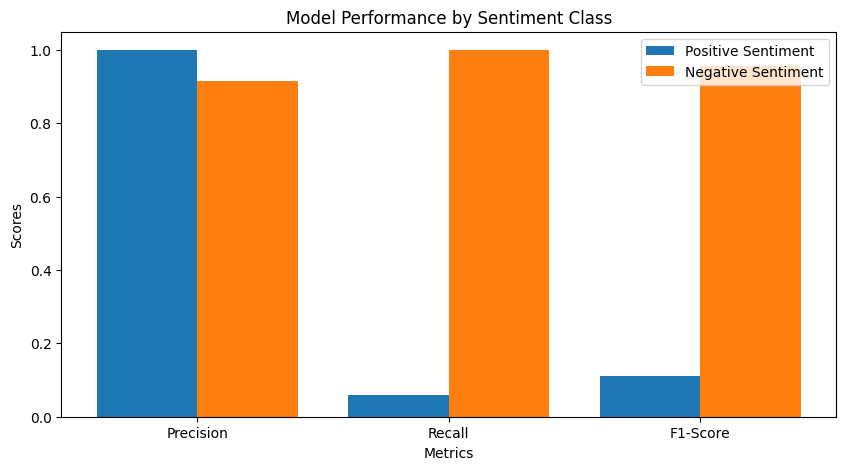

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Precision', 'Recall', 'F1-Score']
positive_scores = [precision_score(y_test, predicted, average="binary", pos_label="Positif"),
                   recall_score(y_test, predicted, average="binary", pos_label="Positif"),
                   f1_score(y_test, predicted, average="binary", pos_label="Positif")]

negative_scores = [precision_score(y_test, predicted, average="binary", pos_label="Negatif"),
                   recall_score(y_test, predicted, average="binary", pos_label="Negatif"),
                   f1_score(y_test, predicted, average="binary", pos_label="Negatif")]

x = range(len(labels))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot positive sentiment scores
ax.bar(x, positive_scores, width=0.4, label='Positive Sentiment', align='center')
ax.bar([i + 0.4 for i in x], negative_scores, width=0.4, label='Negative Sentiment', align='center')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance by Sentiment Class')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


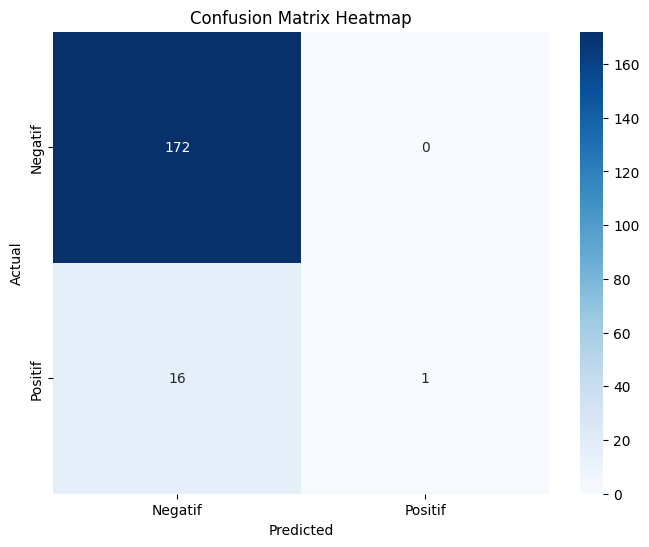

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


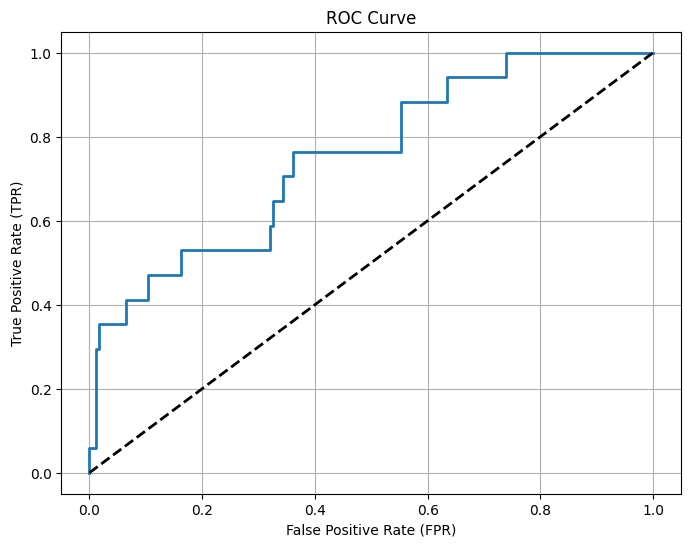

AUC: 0.7517099863201094


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Ubah label kelas menjadi biner
y_test_binary = y_test.map({'Negatif': 0, 'Positif': 1})

# Ubah juga y_scores jika belum
# y_scores = clf.predict_proba(X_test)[:, 1]

# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
auc = roc_auc_score(y_test_binary, y_scores)

# Plot ROC curve dan tampilkan AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

print(f'AUC: {auc}')


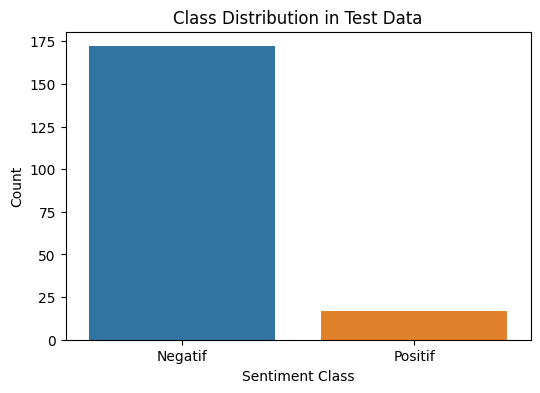

In [ ]:
class_distribution = y_test.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Data')
plt.show()


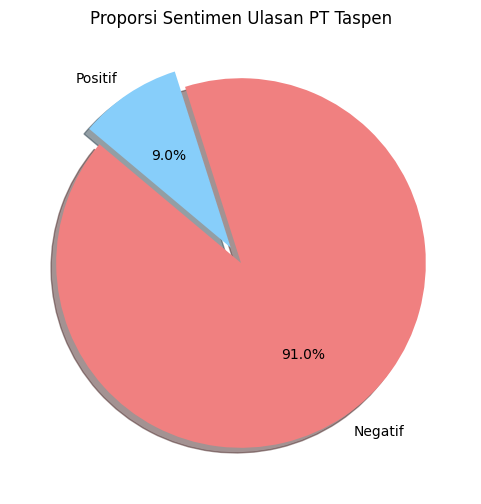

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi kelas sentimen
class_distribution = y_test.value_counts()

# Labels dan data untuk pie chart
labels = class_distribution.index
sizes = class_distribution.values

# Warna untuk setiap bagian pie chart
colors = ['lightcoral', 'lightskyblue']

# Explode untuk melepaskan potongan 'Positif'
explode = (0, 0.1)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporsi Sentimen Ulasan PT Taspen')
plt.show()
